# Proyección de datos 
## Grado en Ingeniería Informática. Universidad de Burgos
**Autor:** Alicia Olivares Gil

In [1]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #matplotlib.pyplot como plot
import pickle as pk
import loadData as ld
from sklearn import manifold 

### Leer datos: 

In [2]:
with open('datos_normalizados.pkl','rb') as f: 
    datos = pk.load(f) 

print(len(datos))

124


In [3]:
with open('datos_estadisticos.pkl','rb') as f: 
    datos_estadisticos = pk.load(f) 

print(len(datos))

124


In [4]:
diacrisis1 = datos[74]
diacrisis1.head()
diacrisis2 = datos[109]
diacrisis2.head()

,DateTime,P1,P2,P3,P4,P5,P6,target
5375569,2019-01-09 21:18:44,0.000000,13.114754,5.737705,0.000000,0.000000,0.0,False
5375570,2019-01-09 21:18:44,0.000000,22.950820,20.491803,11.475410,0.000000,0.0,False
5375568,2019-01-09 21:18:44,0.000000,21.311475,13.934426,4.098361,0.000000,0.0,False
5375566,2019-01-09 21:18:44,4.098361,27.049180,22.950820,12.295082,0.000000,0.0,False
5375565,2019-01-09 21:18:44,0.000000,27.049180,29.508197,24.590164,7.377049,0.0,False


In [5]:
diacrisis1_estadisticos = datos_estadisticos[74]
diacrisis1_estadisticos.head()
diacrisis2_estadisticos = datos_estadisticos[109]
diacrisis2_estadisticos.head()

,DateTime,P1 mean 25,P2 mean 25,P3 mean 25,P4 mean 25,P5 mean 25,P6 mean 25,P1 std 25,P2 std 25,P3 std 25,P4 std 25,P5 std 25,P6 std 25,P1 range 25,P2 range 25,P3 range 25,P4 range 25,P5 range 25,P6 range 25,target
5375588,2019-01-09 21:18:59,0.445236,56.277827,54.140695,34.728406,2.493321,0.62333,4.195599,14.908651,29.035647,34.063682,17.354775,5.873839,9.259259,31.481481,75.925926,85.185185,35.185185,12.962963,False
5375589,2019-01-09 21:19:00,0.445236,56.544969,55.565450,36.420303,2.493321,0.62333,4.195599,12.586797,24.806128,31.159680,17.354775,5.873839,9.259259,20.370370,57.407407,75.925926,35.185185,12.962963,False
5375590,2019-01-09 21:19:00,0.445236,56.990205,55.654497,36.242208,2.493321,0.62333,4.195599,12.586797,24.791932,31.221760,17.354775,5.873839,9.259259,20.370370,57.407407,75.925926,35.185185,12.962963,False
5375591,2019-01-09 21:19:01,0.445236,56.277827,56.099733,37.488869,2.493321,0.62333,4.195599,12.732796,23.887910,29.535547,17.354775,5.873839,9.259259,20.370370,53.703704,66.666667,35.185185,12.962963,False
5375592,2019-01-09 21:19:02,0.000000,55.298308,55.654497,37.666963,2.493321,0.62333,0.000000,11.079348,23.826422,29.491808,17.354775,5.873839,0.000000,20.370370,53.703704,66.666667,35.185185,12.962963,False


### Día del ataque 

In [6]:
#20 minutos antes y después del ataque 
inicio =pd.to_datetime('2018-11-10 3:00:00')
fin = pd.to_datetime('2018-11-10 4:10:00')

datosAtaque = diacrisis1.loc[diacrisis1['DateTime']>inicio]
datosAtaque = datosAtaque.loc[datosAtaque['DateTime']<fin]

print(len(datosAtaque))
datosAtaque.head()

10495


,DateTime,P1,P2,P3,P4,P5,P6,target
3449532,2018-11-10 03:00:01,5.737705,25.409836,18.852459,21.311475,21.311475,14.754098,False
3449533,2018-11-10 03:00:01,5.737705,24.590164,18.852459,22.131148,21.311475,15.573770,False
3449534,2018-11-10 03:00:01,5.737705,25.409836,18.032787,22.131148,21.311475,15.573770,False
3449536,2018-11-10 03:00:02,5.737705,25.409836,18.852459,21.311475,21.311475,15.573770,False
3449535,2018-11-10 03:00:02,5.737705,24.590164,18.032787,22.131148,21.311475,15.573770,False


In [7]:
datosEstadisticosAtaque = diacrisis1_estadisticos.loc[diacrisis1_estadisticos['DateTime']>inicio]
datosEstadisticosAtaque = datosEstadisticosAtaque.loc[datosEstadisticosAtaque['DateTime']<fin]

print(len(datosEstadisticosAtaque))
datosEstadisticosAtaque.head()

10495


,DateTime,P1 mean 25,P2 mean 25,P3 mean 25,P4 mean 25,P5 mean 25,P6 mean 25,P1 std 25,P2 std 25,P3 std 25,P4 std 25,P5 std 25,P6 std 25,P1 range 25,P2 range 25,P3 range 25,P4 range 25,P5 range 25,P6 range 25,target
3449532,2018-11-10 03:00:01,12.386917,54.070981,39.109255,46.764092,46.207376,32.776618,1.512109,1.823672,2.671436,2.735509,3.245249,2.524760,1.694915,3.389831,3.389831,3.389831,3.389831,3.389831,False
3449533,2018-11-10 03:00:01,12.317328,53.931802,39.109255,46.694502,46.068198,32.707029,1.262380,1.861278,2.671436,2.524760,2.978045,2.279591,1.694915,3.389831,3.389831,3.389831,3.389831,3.389831,False
3449534,2018-11-10 03:00:01,12.317328,53.931802,39.109255,46.694502,45.998608,32.707029,1.262380,1.861278,2.671436,2.524760,2.966389,2.279591,1.694915,3.389831,3.389831,3.389831,3.389831,3.389831,False
3449535,2018-11-10 03:00:02,12.317328,53.931802,39.178845,46.624913,45.929019,32.707029,1.262380,1.861278,2.671436,2.632244,2.942939,2.279591,1.694915,3.389831,3.389831,3.389831,3.389831,3.389831,False
3449536,2018-11-10 03:00:02,12.317328,53.931802,39.178845,46.624913,45.929019,32.707029,1.262380,1.861278,2.671436,2.632244,2.942939,2.279591,1.694915,3.389831,3.389831,3.389831,3.389831,3.389831,False


## Selección de características 

In [8]:
presiones = datosAtaque[["P1","P2","P3","P4","P5","P6"]]
presionesEstadisticas = datosEstadisticosAtaque[["P1 mean 25","P2 mean 25","P3 mean 25","P4 mean 25","P5 mean 25", "P6 mean 25","P1 std 25","P2 std 25","P3 std 25","P4 std 25","P5 std 25", "P6 std 25","P1 range 25","P2 range 25","P3 range 25","P4 range 25","P5 range 25", "P6 range 25"]]

## Normalizar datos estadísticos 

In [9]:
from transformers import Normalizer 
norm = Normalizer(100)
presionesMedia = norm.fit_transform(presionesEstadisticas[["P1 mean 25","P2 mean 25","P3 mean 25","P4 mean 25","P5 mean 25", "P6 mean 25"]])
presionesDesviacion = norm.fit_transform(presionesEstadisticas[["P1 std 25","P2 std 25","P3 std 25","P4 std 25","P5 std 25", "P6 std 25"]])
presionesRango = norm.fit_transform(presionesEstadisticas[["P1 range 25","P2 range 25","P3 range 25","P4 range 25","P5 range 25", "P6 range 25"]])
presionesEstadisticas = pd.concat([presionesMedia,presionesDesviacion,presionesRango],axis=1)
presionesEstadisticas.head()

,P1 mean 25,P2 mean 25,P3 mean 25,P4 mean 25,P5 mean 25,P6 mean 25,P1 std 25,P2 std 25,P3 std 25,P4 std 25,P5 std 25,P6 std 25,P1 range 25,P2 range 25,P3 range 25,P4 range 25,P5 range 25,P6 range 25
3449532,16.435826,71.745152,51.892890,62.049861,61.311173,43.490305,4.13417,4.985997,7.303818,7.478995,8.872646,6.902800,3.333333,6.666667,6.666667,6.666667,6.666667,6.666667
3449533,16.343490,71.560480,51.892890,61.957525,61.126500,43.397969,3.45140,5.088811,7.303818,6.902800,8.142098,6.232496,3.333333,6.666667,6.666667,6.666667,6.666667,6.666667
3449534,16.343490,71.560480,51.892890,61.957525,61.034164,43.397969,3.45140,5.088811,7.303818,6.902800,8.110231,6.232496,3.333333,6.666667,6.666667,6.666667,6.666667,6.666667
3449535,16.343490,71.560480,51.985226,61.865189,60.941828,43.397969,3.45140,5.088811,7.303818,7.196666,8.046117,6.232496,3.333333,6.666667,6.666667,6.666667,6.666667,6.666667
3449536,16.343490,71.560480,51.985226,61.865189,60.941828,43.397969,3.45140,5.088811,7.303818,7.196666,8.046117,6.232496,3.333333,6.666667,6.666667,6.666667,6.666667,6.666667


## Filtrar datos

In [10]:
from transformers import ButterTransformer
bt = ButterTransformer(3,0.05)
presiones = bt.fit_transform(presiones)
presionesEstadisticas = bt.fit_transform(presionesEstadisticas)

### Eliminar precisión: 

In [11]:
presiones = presiones.astype(np.float32)
presionesEstadisticas = presionesEstadisticas.astype(np.float32)

presiones = presiones.dropna()
presionesEstadisticas = presionesEstadisticas.dropna()

## Isomap

### - Datos en Bruto: 

In [12]:
#Particionar datos: 
tam_particion_Isomap = 1

presionesIsomap = presiones.iloc[0::tam_particion_Isomap,:]
print(len(presionesIsomap))
presionesIsomap.head()

10495


,P1 BUTTER,P2 BUTTER,P3 BUTTER,P4 BUTTER,P5 BUTTER,P6 BUTTER
3449532,5.758600,25.404375,18.832855,21.278210,21.297077,14.749940
3449533,5.718778,25.463501,18.781780,21.303030,21.297003,14.815488
3449534,5.680354,25.521641,18.731167,21.329729,21.300497,14.881130
3449536,5.643323,25.577452,18.681234,21.358061,21.308073,14.946378
3449535,5.607673,25.629669,18.632204,21.387804,21.320171,15.010783


In [13]:
iso = manifold.Isomap(n_neighbors=10, n_components=2)
isomap2D = iso.fit_transform(presionesIsomap)

In [14]:
#guardar resultados
with open('isoDB.pdd','wb') as f:
    pk.dump(isomap2D,f)

In [13]:
#cargar datos 
with open('isoDB.pdd','rb') as f: 
    isomap2D = pk.load(f) 

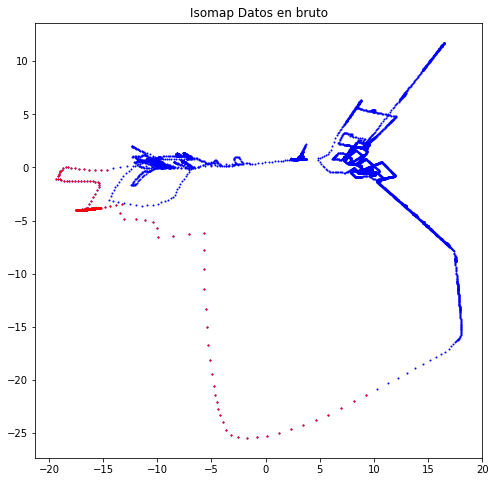

In [14]:
plt.figure(figsize=(8,8))

x = isomap2D[:,0]
y = isomap2D[:,1]

target = datosAtaque['target'].values
target = target[0::tam_particion_Isomap]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(isomap2D[i,0], isomap2D[i,1], s=1, c='r')
plt.title("Isomap Datos en bruto")
plt.savefig('isomapDB.png')

### - Datos Estadísticos: 

In [15]:
#particionar datos:
tam_particion_IsomapEst = 1

presionesEstadisticasIsomap = presionesEstadisticas.iloc[0::tam_particion_IsomapEst,:]
print(len(presionesEstadisticasIsomap))
presionesEstadisticasIsomap.head()

10495


,P1 mean 25 BUTTER,P2 mean 25 BUTTER,P3 mean 25 BUTTER,P4 mean 25 BUTTER,P5 mean 25 BUTTER,P6 mean 25 BUTTER,P1 std 25 BUTTER,P2 std 25 BUTTER,P3 std 25 BUTTER,P4 std 25 BUTTER,P5 std 25 BUTTER,P6 std 25 BUTTER,P1 range 25 BUTTER,P2 range 25 BUTTER,P3 range 25 BUTTER,P4 range 25 BUTTER,P5 range 25 BUTTER,P6 range 25 BUTTER
3449532,16.471607,71.741096,51.917679,62.037918,61.250313,43.466091,4.052831,5.131800,7.276857,7.317504,8.680750,6.825077,3.362815,6.833617,6.483842,6.386829,6.480144,6.592117
3449533,16.436478,71.801620,51.933899,61.972012,61.135899,43.439831,4.335541,6.028934,7.302252,7.237232,8.536765,6.752093,3.974308,7.804186,6.511597,6.241072,6.680079,6.416461
3449534,16.400408,71.862434,51.948963,61.905689,61.024166,43.414814,4.625416,6.920732,7.329353,7.166712,8.412005,6.685248,4.582241,8.768019,6.549506,6.117739,6.902843,6.252167
3449535,16.363306,71.923218,51.962467,61.839420,60.916412,43.391441,4.921569,7.799428,7.357853,7.107661,8.309032,6.625579,5.181297,9.715697,6.598505,6.019083,7.147414,6.100478
3449536,16.325069,71.983620,51.974030,61.773701,60.813911,43.370110,5.222940,8.657228,7.387442,7.061663,8.230086,6.574006,5.766222,10.637865,6.659428,5.947149,7.412516,5.962546


In [23]:
iso = manifold.Isomap(n_neighbors=10, n_components=2)
isomap2D = iso.fit_transform(presionesEstadisticasIsomap)

In [24]:
#guardar resultados
with open('isoDE.pdd','wb') as f:
    pk.dump(isomap2D,f)

In [16]:
#cargar datos 
with open('isoDE.pdd','rb') as f: 
    isomap2D = pk.load(f) 

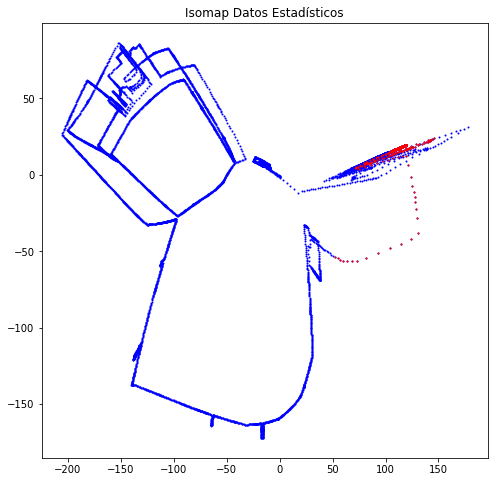

In [17]:
plt.figure(figsize=(8,8))

x = isomap2D[:,0]
y = isomap2D[:,1]

target = datosEstadisticosAtaque['target'].values
target = target[0::tam_particion_IsomapEst]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(isomap2D[i,0], isomap2D[i,1], s=1, c='r')
plt.title("Isomap Datos Estadísticos")
plt.savefig('isomapDE.png')

## Locally Linear Embedding (LLE)

### Datos en Bruto: 

In [18]:
#Particionar datos: 
tam_particion_LLE = 1

presionesLLE = presiones.iloc[0::tam_particion_LLE,:]
print(len(presionesLLE))
presionesLLE.head()

10495


,P1 BUTTER,P2 BUTTER,P3 BUTTER,P4 BUTTER,P5 BUTTER,P6 BUTTER
3449532,5.758600,25.404375,18.832855,21.278210,21.297077,14.749940
3449533,5.718778,25.463501,18.781780,21.303030,21.297003,14.815488
3449534,5.680354,25.521641,18.731167,21.329729,21.300497,14.881130
3449536,5.643323,25.577452,18.681234,21.358061,21.308073,14.946378
3449535,5.607673,25.629669,18.632204,21.387804,21.320171,15.010783


In [28]:
lle = manifold.LocallyLinearEmbedding(n_neighbors= 10, n_components=2, eigen_solver='dense')
lle2D = lle.fit_transform(presionesLLE)

In [30]:
#guardar resultados
with open('lleDB.pdd','wb') as f:
    pk.dump(lle2D,f)

In [19]:
#cargar datos 
with open('lleDB.pdd','rb') as f: 
    lle2D = pk.load(f) 

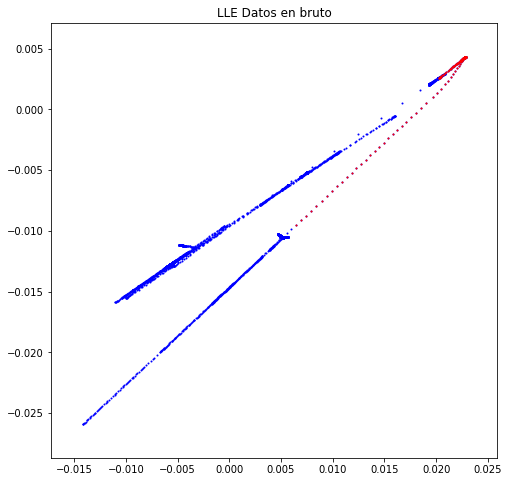

In [20]:
plt.figure(figsize=(8,8))

x = lle2D[:,0]
y = lle2D[:,1]

target = datosAtaque['target'].values
target = target[0::tam_particion_LLE]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(lle2D[i,0], lle2D[i,1], s=1, c='r')
plt.title("LLE Datos en bruto")
plt.savefig('lleDB.png')

### - Datos Estadísticos: 

In [21]:
#particionar datos:
tam_particion_LLEEst = 1

presionesEstadisticasLLE = presionesEstadisticas.iloc[0::tam_particion_LLEEst,:]
print(len(presionesEstadisticasLLE))
presionesEstadisticasLLE.head()

10495


,P1 mean 25 BUTTER,P2 mean 25 BUTTER,P3 mean 25 BUTTER,P4 mean 25 BUTTER,P5 mean 25 BUTTER,P6 mean 25 BUTTER,P1 std 25 BUTTER,P2 std 25 BUTTER,P3 std 25 BUTTER,P4 std 25 BUTTER,P5 std 25 BUTTER,P6 std 25 BUTTER,P1 range 25 BUTTER,P2 range 25 BUTTER,P3 range 25 BUTTER,P4 range 25 BUTTER,P5 range 25 BUTTER,P6 range 25 BUTTER
3449532,16.471607,71.741096,51.917679,62.037918,61.250313,43.466091,4.052831,5.131800,7.276857,7.317504,8.680750,6.825077,3.362815,6.833617,6.483842,6.386829,6.480144,6.592117
3449533,16.436478,71.801620,51.933899,61.972012,61.135899,43.439831,4.335541,6.028934,7.302252,7.237232,8.536765,6.752093,3.974308,7.804186,6.511597,6.241072,6.680079,6.416461
3449534,16.400408,71.862434,51.948963,61.905689,61.024166,43.414814,4.625416,6.920732,7.329353,7.166712,8.412005,6.685248,4.582241,8.768019,6.549506,6.117739,6.902843,6.252167
3449535,16.363306,71.923218,51.962467,61.839420,60.916412,43.391441,4.921569,7.799428,7.357853,7.107661,8.309032,6.625579,5.181297,9.715697,6.598505,6.019083,7.147414,6.100478
3449536,16.325069,71.983620,51.974030,61.773701,60.813911,43.370110,5.222940,8.657228,7.387442,7.061663,8.230086,6.574006,5.766222,10.637865,6.659428,5.947149,7.412516,5.962546


In [34]:
lle = manifold.LocallyLinearEmbedding(n_neighbors= 10, n_components=2, eigen_solver='dense')
lle2D = lle.fit_transform(presionesEstadisticasLLE)

In [35]:
#guardar resultados
with open('lleDE.pdd','wb') as f:
    pk.dump(lle2D,f)

In [22]:
#cargar datos 
with open('lleDE.pdd','rb') as f: 
    lle2D = pk.load(f) 

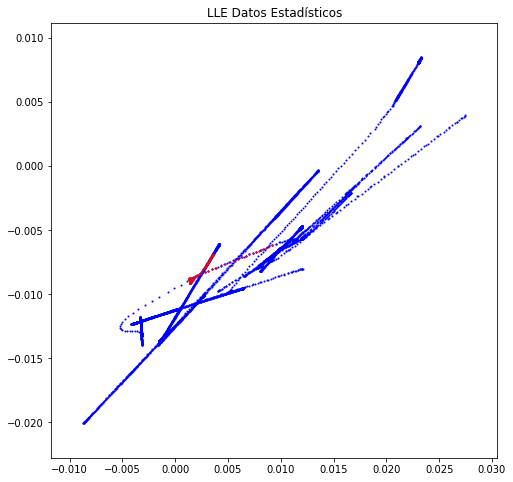

In [23]:
plt.figure(figsize=(8,8))

x = lle2D[:,0]
y = lle2D[:,1]

target = datosEstadisticosAtaque['target'].values
target = target[0::tam_particion_LLEEst]

plt.scatter(x,y, s=1, c='b')

for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(lle2D[i,0], lle2D[i,1], s=1, c='r')
plt.title("LLE Datos Estadísticos")
plt.savefig('leeDE.png')

## Modified Locally Linear Embedding (MLLE)

### - Datos en Bruto: 

In [38]:
#Particionar datos: 
tam_particion_MLLE = 1

presionesMLLE = presiones.iloc[0::tam_particion_MLLE,:]
print(len(presionesMLLE))
presionesMLLE.head()

10495


,P1 BUTTER,P2 BUTTER,P3 BUTTER,P4 BUTTER,P5 BUTTER,P6 BUTTER
3449532,5.758600,25.404375,18.832855,21.278210,21.297077,14.749940
3449533,5.718778,25.463501,18.781780,21.303030,21.297003,14.815488
3449534,5.680354,25.521641,18.731167,21.329729,21.300497,14.881130
3449536,5.643323,25.577452,18.681234,21.358061,21.308073,14.946378
3449535,5.607673,25.629669,18.632204,21.387804,21.320171,15.010783


In [39]:
mlle = manifold.LocallyLinearEmbedding(n_neighbors = 5, n_components=2, eigen_solver='dense', method='modified')
mlle2D = mlle.fit_transform(presionesMLLE)

/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/sklearn/manifold/locally_linear.py:450: RuntimeWarning: invalid value encountered in double_scalars
  alpha_i = np.linalg.norm(Vi.sum(0)) / np.sqrt(s_i)


In [40]:
#guardar resultados
with open('mlleDB.pdd','wb') as f:
    pk.dump(mlle2D,f)

In [41]:
#cargar datos 
with open('mlleDB.pdd','rb') as f: 
    mlle2D = pk.load(f) 

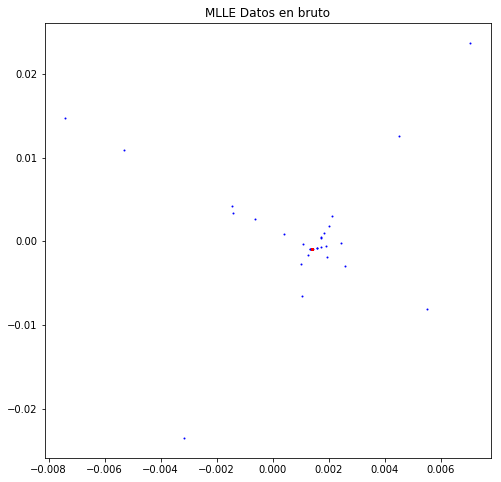

In [46]:
plt.figure(figsize=(8,8))

x = mlle2D[:,0]
y = mlle2D[:,1]

target = datosEstadisticosAtaque['target'].values
target = target[0::tam_particion_MLLE]

for i in range(len(x)): 
    if x[i] < 0.01 and x[i]>-0.01 and y[i]<0.025 and y[i] >-0.025: 
        plt.scatter(mlle2D[i,0], mlle2D[i,1], s=1, c='b')

#plt.scatter(x,y, s=1, c='b')

for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(mlle2D[i,0], mlle2D[i,1], s=1, c='r')
plt.title("MLLE Datos en bruto")
plt.savefig('mlleDB.png')

### - Datos Estadísticos: 

In [47]:
#particionar datos:
tam_particion_MLLEEst = 1

presionesEstadisticasMLLE = presionesEstadisticas.iloc[0::tam_particion_MLLEEst,:]
print(len(presionesEstadisticasMLLE))
presionesEstadisticasMLLE.head()

10495


,P1 mean 25 BUTTER,P2 mean 25 BUTTER,P3 mean 25 BUTTER,P4 mean 25 BUTTER,P5 mean 25 BUTTER,P6 mean 25 BUTTER,P1 std 25 BUTTER,P2 std 25 BUTTER,P3 std 25 BUTTER,P4 std 25 BUTTER,P5 std 25 BUTTER,P6 std 25 BUTTER,P1 range 25 BUTTER,P2 range 25 BUTTER,P3 range 25 BUTTER,P4 range 25 BUTTER,P5 range 25 BUTTER,P6 range 25 BUTTER
3449532,16.471607,71.741096,51.917679,62.037918,61.250313,43.466091,4.052831,5.131800,7.276857,7.317504,8.680750,6.825077,3.362815,6.833617,6.483842,6.386829,6.480144,6.592117
3449533,16.436478,71.801620,51.933899,61.972012,61.135899,43.439831,4.335541,6.028934,7.302252,7.237232,8.536765,6.752093,3.974308,7.804186,6.511597,6.241072,6.680079,6.416461
3449534,16.400408,71.862434,51.948963,61.905689,61.024166,43.414814,4.625416,6.920732,7.329353,7.166712,8.412005,6.685248,4.582241,8.768019,6.549506,6.117739,6.902843,6.252167
3449535,16.363306,71.923218,51.962467,61.839420,60.916412,43.391441,4.921569,7.799428,7.357853,7.107661,8.309032,6.625579,5.181297,9.715697,6.598505,6.019083,7.147414,6.100478
3449536,16.325069,71.983620,51.974030,61.773701,60.813911,43.370110,5.222940,8.657228,7.387442,7.061663,8.230086,6.574006,5.766222,10.637865,6.659428,5.947149,7.412516,5.962546


In [48]:
mlle = manifold.LocallyLinearEmbedding(n_neighbors = 5, n_components=2, eigen_solver='dense', method='modified')
mlle2D = mlle.fit_transform(presionesEstadisticasMLLE)

/usr/local/anaconda3/envs/TFG/lib/python3.6/site-packages/sklearn/manifold/locally_linear.py:450: RuntimeWarning: invalid value encountered in double_scalars
  alpha_i = np.linalg.norm(Vi.sum(0)) / np.sqrt(s_i)


In [50]:
#guardar resultados
with open('mlleDE.pdd','wb') as f:
    pk.dump(mlle2D,f)

In [51]:
#cargar datos 
with open('mlleDE.pdd','rb') as f: 
    mlle2D = pk.load(f)

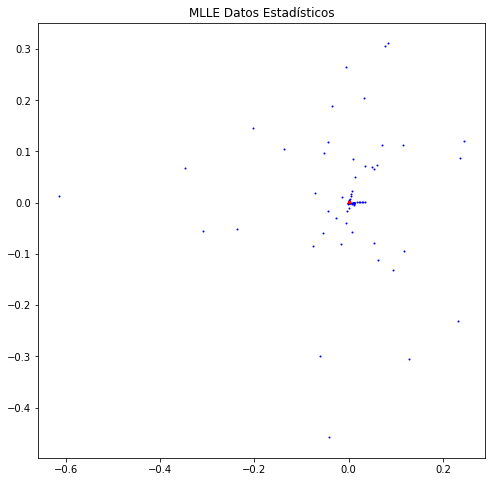

In [52]:
plt.figure(figsize=(8,8))

x = mlle2D[:,0]
y = mlle2D[:,1]

target = datosEstadisticosAtaque['target'].values
target = target[0::tam_particion_MLLEEst]

plt.scatter(x,y, s=1, c='b')
for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(mlle2D[i,0], mlle2D[i,1], s=1, c='r')
plt.title("MLLE Datos Estadísticos")
plt.savefig('isomapDE.png')

## Hessian Eigenmapping

### - Datos en bruto: 

In [20]:
#Particionar datos: 
tam_particion_HE = 8

presionesHE = presiones.iloc[0::tam_particion_HE,:]
print(len(presionesHE))
presionesHE.head()

14767


,P1,P2,P3,P4,P5,P6
1975678,0.000000,30.693069,36.633663,46.534653,37.623764,17.821783
1975687,5.940594,27.722773,30.693069,38.613861,29.702971,15.841584
1975694,8.910892,31.683168,30.693069,35.643566,23.762377,12.871287
1975702,6.930693,27.722773,30.693069,40.594059,29.702971,14.851485
1975710,6.930693,28.712872,31.683168,41.584160,28.712872,14.851485


In [21]:
he = manifold.LocallyLinearEmbedding(n_neighbors = 20, n_components=2, eigen_solver='dense', method='hessian')
he2D = he.fit_transform(presionesHE)

In [22]:
#guardar resultados
with open('heDB.pdd','wb') as f:
    pk.dump(he2D,f)

In [23]:
#cargar datos 
with open('heDB.pdd','rb') as f: 
    he2D = pk.load(f)

Text(0.5, 1.0, 'HE Datos en bruto')

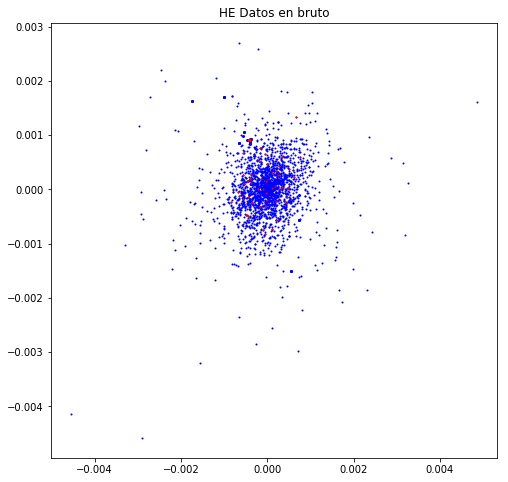

In [25]:
plt.figure(figsize=(8,8))

x = he2D[:,0]
y = he2D[:,1]

target = datosEstadisticosAtaque['target'].values
target = target[0::tam_particion_HE]

for i in range(len(x)): 
    if x[i] < 0.005 and x[i]>-0.005 and y[i]<0.005 and y[i]>-0.005: 
        plt.scatter(he2D[i,0], he2D[i,1], s=1, c='b')

#plt.scatter(x,y, s=1, c='b')

for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(he2D[i,0], he2D[i,1], s=1, c='r')
plt.title("HE Datos en bruto")

### - Datos Estadísticos: 

In [25]:
#particionar datos:
tam_particion_HEEst = 8

presionesEstadisticasHE = presionesEstadisticas.iloc[0::tam_particion_HEEst,:]
print(len(presionesEstadisticasHE))
presionesEstadisticasHE.head()

14767


,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P1 std,P2 std,P3 std,P4 std,P5 std,P6 std
1975678,0.072423,0.529248,0.524373,0.642061,0.497911,0.275070,0.175435,0.129623,0.209061,0.297315,0.286238,0.080057
1975687,0.054318,0.527159,0.559889,0.694986,0.539694,0.278552,0.151965,0.136471,0.156657,0.204707,0.211401,0.074451
1975694,0.061978,0.519499,0.563370,0.699164,0.543175,0.276462,0.149529,0.143379,0.142287,0.155548,0.156834,0.060770
1975702,0.096797,0.502786,0.553621,0.719359,0.550139,0.273677,0.100302,0.064905,0.081131,0.155012,0.152920,0.046569
1975710,0.113510,0.510446,0.561978,0.738858,0.553621,0.274373,0.032559,0.094651,0.106533,0.162305,0.151783,0.044203


In [26]:
he = manifold.LocallyLinearEmbedding(n_neighbors = 20, n_components=2, eigen_solver='dense', method='hessian')
he2D = he.fit_transform(presionesEstadisticasHE)

In [27]:
#guardar resultados
with open('heDE.pdd','wb') as f:
    pk.dump(he2D,f)

In [28]:
#cargar datos 
with open('heDE.pdd','rb') as f: 
    he2D = pk.load(f)

Text(0.5, 1.0, 'HE Datos Estadísticos')

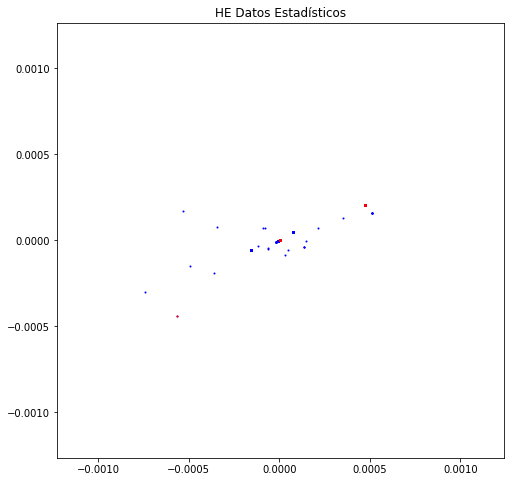

In [35]:
plt.figure(figsize=(8,8))

x = he2D[:,0]
y = he2D[:,1]

target = datosEstadisticosAtaque['target'].values
target = target[0::tam_particion_HEEst]

for i in range(len(x)): 
    if x[i]>-0.001 and x[i]<0.001 and y[i]<0.002 and y[i]>-0.002: 
        plt.scatter(he2D[i,0], he2D[i,1], s=1, c='b')

#plt.scatter(x,y, s=1, c='b')

for i in range(0,len(target)): 
    if target[i]: 
        plt.scatter(he2D[i,0], he2D[i,1], s=1, c='r')
plt.title("HE Datos Estadísticos")
